<a href="https://colab.research.google.com/github/chemsedd/smart_green/blob/master/Smart_green_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [ ]:
# load data
drive.mount('drive/')
full_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/smart-green/data-labeled.csv')

Drive already mounted at drive/; to attempt to forcibly remount, call drive.mount("drive/", force_remount=True).


In [ ]:
full_data

,Unnamed: 0,Year,Month,Day,Precipitation,Relative Humidity,Pressure,Temp_avg,Temp_min,Temp_max,Suitability
0,0,2009,January,1,0.15,72.07,99.43,9.86,4.90,14.92,Moderately Suitable
1,1,2009,January,2,0.11,63.27,98.94,11.45,8.61,15.95,Moderately Suitable
2,2,2009,January,3,0.12,72.29,98.53,11.41,6.22,16.77,Moderately Suitable
3,3,2009,January,4,3.98,78.63,98.14,11.20,8.31,16.33,Moderately Suitable
4,4,2009,January,5,0.08,65.45,98.23,9.34,5.82,15.31,Moderately Suitable
...,...,...,...,...,...,...,...,...,...,...,...
4103,4103,2020,March,27,1.58,55.19,98.00,13.30,5.96,19.61,Suitable
4104,4104,2020,March,28,8.38,70.06,98.21,13.47,10.23,17.83,Suitable
4105,4105,2020,March,29,0.91,54.82,98.26,13.35,7.95,19.35,Suitable
4106,4106,2020,March,30,0.00,54.72,98.46,13.30,6.24,19.79,Suitable


In [159]:
# Specify features to use for training
# 
data = full_data.iloc[:,4:8]
data = np.array(data, dtype=float)
data

array([[1.500e-01, 7.207e+01, 9.943e+01, 9.860e+00],
       [1.100e-01, 6.327e+01, 9.894e+01, 1.145e+01],
       [1.200e-01, 7.229e+01, 9.853e+01, 1.141e+01],
       ...,
       [9.100e-01, 5.482e+01, 9.826e+01, 1.335e+01],
       [0.000e+00, 5.472e+01, 9.846e+01, 1.330e+01],
       [7.000e-02, 4.762e+01, 9.838e+01, 1.507e+01]])

In [160]:
# Scale input data in range 0...1
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data)
# Reshape data
reshaped_data = normalized_data.reshape(4108, 4, 1)
reshaped_data

array([[[0.00349081],
        [0.78351405],
        [0.66101695],
        [0.17912553]],

       [[0.00255993],
        [0.67508625],
        [0.54237288],
        [0.22397743]],

       [[0.00279265],
        [0.78622474],
        [0.44309927],
        [0.22284908]],

       ...,

       [[0.02117757],
        [0.57097092],
        [0.37772397],
        [0.27757405]],

       [[0.        ],
        [0.56973879],
        [0.42615012],
        [0.27616361]],

       [[0.00162904],
        [0.48225727],
        [0.40677966],
        [0.32609309]]])

In [161]:
# land suitability (classes)
target = full_data.iloc[:,-1]
output = {
    'Best Suitability':np.array([0, 0, 0, 1], dtype=int),
    'Suitable':np.array([0, 0, 1, 0], dtype=int),
    'Moderately Suitable': np.array([0, 1, 0, 0], dtype=int),
    'Unsuitable':np.array([1, 0, 0, 0], dtype=int),
}
num_target = np.array([target.map(output)], dtype=int)[0]
num_target

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [162]:
print(reshaped_data.shape)
print(num_target.shape)

(4108, 4, 1)
(4108, 4)


In [163]:
# splitting the data into train and test sets (input and output)
x_train, x_test, y_train, y_test = train_test_split(reshaped_data, num_target, test_size=0.25, random_state=2)

In [ ]:
# Building the RNN LSTM model
model = Sequential()
model.add(LSTM(16, batch_input_shape=(None, 4, 1), activation='relu', return_state=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_49 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_50 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_51 (Dense)             (None, 4)                 68        
Total params: 2,292
Trainable params: 2,292
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=200, batch_size=5, validation_data=(x_test, y_test))

Epoch 1/200
617/617 [==============================] - 2s 3ms/step - loss: 1.2335 - accuracy: 0.4340 - val_loss: 1.1990 - val_accuracy: 0.4372
Epoch 2/200
617/617 [==============================] - 2s 3ms/step - loss: 1.0939 - accuracy: 0.5326 - val_loss: 0.9364 - val_accuracy: 0.5920
Epoch 3/200
617/617 [==============================] - 2s 3ms/step - loss: 0.8388 - accuracy: 0.5680 - val_loss: 0.7093 - val_accuracy: 0.6728
Epoch 4/200
617/617 [==============================] - 2s 3ms/step - loss: 0.6438 - accuracy: 0.7205 - val_loss: 0.5770 - val_accuracy: 0.7410
Epoch 5/200
617/617 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.7932 - val_loss: 0.4935 - val_accuracy: 0.7770
Epoch 6/200
617/617 [==============================] - 2s 3ms/step - loss: 0.4368 - accuracy: 0.8338 - val_loss: 0.3898 - val_accuracy: 0.8520
Epoch 7/200
617/617 [==============================] - 2s 3ms/step - loss: 0.3791 - accuracy: 0.8562 - val_loss: 0.3271 - val_accuracy: 0.8939

In [164]:
# Predict on testing dataset
results = model.predict(x_test)
results

array([[8.7495649e-15, 1.3205406e-04, 9.9986792e-01, 1.9994549e-11],
       [9.0202179e-11, 1.4759993e-02, 9.8523998e-01, 1.7871667e-14],
       [1.6170991e-09, 6.9412917e-02, 9.3058711e-01, 9.1899856e-16],
       ...,
       [4.3023238e-09, 1.0000000e+00, 2.4107121e-09, 0.0000000e+00],
       [2.5101832e-34, 6.4868319e-16, 2.2549930e-03, 9.9774504e-01],
       [2.3329628e-20, 3.4679603e-04, 9.9965322e-01, 1.6947255e-20]],
      dtype=float32)

In [166]:
# Choose the class with the maximum probability
classes = np.argmax(results, axis=1)
# Map probability to the appropriate class 
suitability = ['Unsuitable', 'Moderately suitable', 'Suitable', 'Best suitability']
classes = classes.reshape(-1, 1)
classes
y_test_classes = np.argmax(y_test, axis=1)
y_test_classes = y_test_classes.reshape(-1, 1)

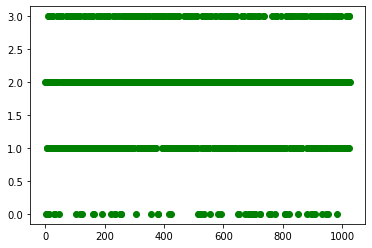

In [167]:
# Plot testing data set
plt.scatter(range(y_test_classes.size), y_test_classes, c='g')

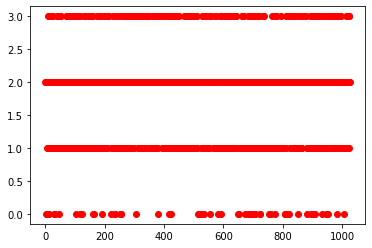

In [169]:
# Plot prediction set
plt.scatter(range(classes.size), classes, c='r')

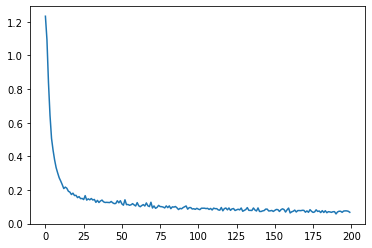

In [170]:
# Plot model accuracy 
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# Export model
model.save('/content/drive/My Drive/Colab Notebooks/smart-green/enhanced 2/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/smart-green/enhanced 2/assets


In [ ]:
for k, i, j in zip(x_test, y_test_classes, classes):
    print (k, '=>', i, j, ' ====> ', i==j)

[[0.00139632]
 [0.2895515 ]
 [0.33171913]
 [0.76530324]] => [2] [2]  ====>  [ True]
[[0.        ]
 [0.24112863]
 [0.43099274]
 [0.78843441]] => [2] [2]  ====>  [ True]
[[0.        ]
 [0.1378758 ]
 [0.41162228]
 [0.79576869]] => [2] [2]  ====>  [ True]
[[0.        ]
 [0.09019221]
 [0.36803874]
 [0.96981664]] => [0] [0]  ====>  [ True]
[[0.        ]
 [0.14255791]
 [0.30992736]
 [0.8922426 ]] => [0] [0]  ====>  [ True]
[[4.65441005e-04]
 [2.04903894e-01]
 [3.58353511e-01]
 [8.31593794e-01]] => [1] [1]  ====>  [ True]
[[0.00325809]
 [0.27501232]
 [0.47699758]
 [0.80705219]] => [1] [2]  ====>  [False]
[[0.        ]
 [0.22708231]
 [0.4188862 ]
 [0.725811  ]] => [2] [2]  ====>  [ True]
[[2.32720503e-04]
 [4.59586003e-02]
 [4.16464891e-01]
 [9.76022567e-01]] => [0] [0]  ====>  [ True]
[[0.00465441]
 [0.41658452]
 [0.50121065]
 [0.6090268 ]] => [3] [3]  ====>  [ True]
[[0.10751687]
 [0.75246427]
 [0.4503632 ]
 [0.16078984]] => [1] [1]  ====>  [ True]
[[0.00395625]
 [0.2840069 ]
 [0.38014528]
 [